# Text age classifier

Our goal is to classify given text to categories. First category means that given text is OK to be given to child to read, second category means that text suits adult but not children.

# We have several main tasks:
- Prepare training, test data
 * Find data 
 * Prepare data
- Build model
 * Train model

In [1]:
import io
import re
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Preparing data

What to do:
- Create dictionary with all words
- Make list of lists containing data
- Norm data so model can train on it
- Create labels (1 - adult, 0 - child)
- Split data to train, validation and test data

### Creating dictionary 

First of all, we should create dictionary with top 10 000 used words in russian language matched to numbers from 0 to 9999.
We need this to represent poems as arrays of numbers, where each number represents a word from array.

I found top 10 000 words from website, now we should parse them into list.

In [2]:
with open(r'files/parsed_top_words.txt', 'r') as infile, \
     open(r'files/filtered_top_words.txt', 'w') as outfile:
    data = infile.read()
    data = data.replace("<tr><td class=text>", "")
    data = data.replace("</td> </tr>", "")
    outfile.write(data)

In [3]:
with open('files/filtered_top_words.txt', 'r') as f:
    wordList = [line.strip() for line in f]

In [4]:
str(wordList[:10])

"['не', 'на', 'что', 'как', 'он', 'по', 'из', 'это', 'от', 'за']"

In [5]:
len(wordList)

10000

Creating a dictinary that contains words and numbers.

In [6]:
values = list(range(1, 10001))
dictionary = dict(zip(wordList, values))

In [7]:
str(list(dictionary.items())[:10])

"[('не', 1), ('на', 2), ('что', 3), ('как', 4), ('он', 5), ('по', 6), ('из', 7), ('это', 8), ('от', 9), ('за', 10)]"

### Making a list of lists containing data

Downloading our data.

In [8]:
# Downloading data
# Stories should be split with @-sign

Now we open a txt-file with stories which we downloaded earlier. Making a list of strings.

In [9]:
with io.open('files/tales(1).txt', encoding='utf-8') as file:
    data = file.read().replace('\n', '').lower()

adultTales = data.split('@')

In [10]:
with io.open('files/tales(2).txt', encoding='utf-8') as file:
    data = file.read().replace('\n', '').lower()

funnyTales = data.split('@')

In [11]:
len(adultTales), len(funnyTales)

(16, 16)

Merging adult tales and tales for children in one list.

In [12]:
# Download and add second list.
data = adultTales + funnyTales

In [13]:
data[1]

'история одной жизни ( конец ).переехали мы к деду и бабке в двухкомнатную квартиру, в одной комнате жили они, а в другой —— я с мужем. бабушка лежала парализованная, дед ходил, но плохо. выживать он нас стал сразу, гадил везде, своими фекалиями мазал стены... а я приходила с работы и приходилось сквозь слезы все это мыть. дома были постоянные скандалы из-за этого! мне снилось уже, как я мою стены, убирать за дедом у меня уже не было сил. вот и подошла к концу история одной жизни... написана она по просьбе моей подруги. она хотела, чтоб о ее жизни узнали и не повторяли ошибок, какие делали все действующие лица этой истории. до написания этой истории я и сама не знала таких подробностей ее жизни. теперь во многих ее поступках я ее понимаю...'

So, we have a list of strings. Now we should transform each string to list of words.

In [14]:
data = list(map(lambda x: re.findall(r'\w+', x), data))

In [15]:
str(data[1])

"['история', 'одной', 'жизни', 'конец', 'переехали', 'мы', 'к', 'деду', 'и', 'бабке', 'в', 'двухкомнатную', 'квартиру', 'в', 'одной', 'комнате', 'жили', 'они', 'а', 'в', 'другой', 'я', 'с', 'мужем', 'бабушка', 'лежала', 'парализованная', 'дед', 'ходил', 'но', 'плохо', 'выживать', 'он', 'нас', 'стал', 'сразу', 'гадил', 'везде', 'своими', 'фекалиями', 'мазал', 'стены', 'а', 'я', 'приходила', 'с', 'работы', 'и', 'приходилось', 'сквозь', 'слезы', 'все', 'это', 'мыть', 'дома', 'были', 'постоянные', 'скандалы', 'из', 'за', 'этого', 'мне', 'снилось', 'уже', 'как', 'я', 'мою', 'стены', 'убирать', 'за', 'дедом', 'у', 'меня', 'уже', 'не', 'было', 'сил', 'вот', 'и', 'подошла', 'к', 'концу', 'история', 'одной', 'жизни', 'написана', 'она', 'по', 'просьбе', 'моей', 'подруги', 'она', 'хотела', 'чтоб', 'о', 'ее', 'жизни', 'узнали', 'и', 'не', 'повторяли', 'ошибок', 'какие', 'делали', 'все', 'действующие', 'лица', 'этой', 'истории', 'до', 'написания', 'этой', 'истории', 'я', 'и', 'сама', 'не', 'знала',

Now we transform each word to number from dictionary.

In [16]:
data = list(map(lambda x: list(map(lambda y: dictionary.get(y, 0), x)), data))

In [17]:
str(data[1])

'[322, 0, 0, 303, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 0, 0, 83, 0, 0, 0, 669, 0, 0, 738, 0, 12, 254, 0, 5, 0, 0, 99, 0, 434, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 253, 0, 0, 8, 3266, 0, 0, 0, 0, 7, 10, 0, 0, 0, 22, 4, 0, 0, 0, 4081, 10, 0, 0, 0, 22, 1, 0, 0, 42, 0, 0, 0, 0, 322, 0, 0, 0, 17, 6, 0, 0, 0, 17, 0, 115, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 49, 0, 0, 0, 0, 0, 0, 0]'

And at the end we transform data to numpy array of lists

In [18]:
data = np.array(data, dtype=object)

### Norming data

Now we should make training data arrays same on size.

In [19]:
len(data[0]), len(data[1])

(364, 130)

In [20]:
data = keras.preprocessing.sequence.pad_sequences(data,
                                                  value=0,
                                                  padding='post',
                                                  maxlen=256)

In [21]:
len(data[0]), len(data[1])

(256, 256)

In [22]:
data[1]

array([ 322,    0,    0,  303,    0,   20,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,   23,    0,    0,   83,    0,
          0,    0,  669,    0,    0,  738,    0,   12,  254,    0,    5,
          0,    0,   99,    0,  434,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,  253,    0,    0,    8, 3266,    0,
          0,    0,    0,    7,   10,    0,    0,    0,   22,    4,    0,
          0,    0, 4081,   10,    0,    0,    0,   22,    1,    0,    0,
         42,    0,    0,    0,    0,  322,    0,    0,    0,   17,    6,
          0,    0,    0,   17,    0,  115,    0,    0,    0,    0,    0,
          1,    0,    0,    0,    0,    0,    0,    0,    0,    0,   21,
          0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
          0,   49,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [23]:
data

array([[   0,    0,    0, ...,   73,    2,  966],
       [ 322,    0,    0, ...,    0,    0,    0],
       [ 322,    0,    0, ...,    0,    0,    0],
       ...,
       [ 108,    0,    0, ...,    0,    0,    0],
       [ 791, 3222,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

###  Creating labels

Assuming that we have same number of child tales and adult tales, we will create an array, that filled for half with zeros, and for half with ones.

In [24]:
zeros = [0 for i in range(int (len(data)/2))]
ones = [1 for i in range(int (len(data)/2))]

labels = zeros + ones
labels = np.array(labels)

In [25]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
len(data), len(labels)

(32, 32)

### Splitting data into train, validation and test

Firstly we should shuffle our tales (now they are located in way where first half is tales for children and second half is tales for adults).

We should notice that it is important to shuffle list of data and list of labels synchronously to keep data and labels matched.

In [27]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

In [28]:
labels

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1])

Now we will choose half of our data for training, 1/4 for validation, 1/4 for testing.

In [29]:
train_data = data[:int((len(data))/2)]
train_labels = labels[:int((len(data))/2)]

validation_data = data[int((len(data))/2): 3*int((len(data))/4)]
validation_labels = labels[int((len(data))/2): 3*int((len(data))/4)]

test_data = data[3*int((len(data))/4):]
test_labels = labels[3*int((len(data))/4):]

In [30]:
len(train_data), len(train_labels), len(validation_data), len(validation_labels), len(test_data), len(test_labels)

(16, 16, 8, 8, 8, 8)

In [31]:
train_data

array([[  0,   0,   0, ...,  73,   2, 966],
       [108,   0,   0, ...,   0,   0,   0],
       [322,   0,   0, ...,   0,   0,   0],
       ...,
       [322,   0,   0, ...,   0,   0,   0],
       [322,   0,   0, ...,   0,   0,   0],
       [322,   0,   0, ...,   0,   0,   0]])

## Bulding model

First layer gets a vector of vords and transforms it into 10000 vector where 1 sign that this word exists in vector.

In [32]:
model = keras.Sequential()
model.add(keras.layers.Embedding(len(dictionary), 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


Compiling our model.

In [33]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Training model

In [34]:
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=32,
                    validation_data=(validation_data, validation_labels),
                    verbose=1)

Train on 16 samples, validate on 8 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
16/16 [==============================] - 1s 40ms/sample - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6942 - val_acc: 0.3750
Epoch 2/20
16/16 [==============================] - 0s 811us/sample - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.6250
Epoch 3/20
16/16 [==============================] - 0s 686us/sample - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6926 - val_acc: 0.6250
Epoch 4/20
16/16 [==============================] - 0s 935us/sample - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6926 - val_acc: 0.6250
Epoch 5/20
16/16 [==============================] - 0s 686us/sample - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6929 - val_acc: 0.6250
Epoch 6/20
16/16 [==============================] - 0s 561us/sample - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.6250
Epoch 7/20
16/16 [==============================] - 0s 997us/sample - loss: 0.6930 - acc: 0.5000 - val_los

## Analysing results

In [35]:
results = model.evaluate(test_data, test_labels)

8/8 [==============================] - 0s 249us/sample - loss: 0.6935 - acc: 0.3750


In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

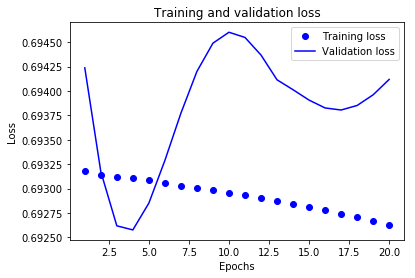

In [37]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

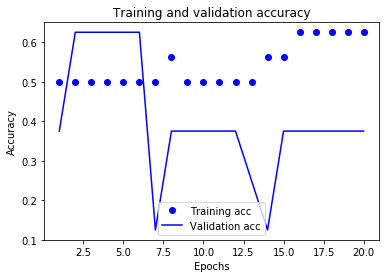

In [38]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()